# Flightlines

In [40]:
import cPickle as pickle
from fatiando import gridder
import numpy as np
import matplotlib.pyplot as plt

In [41]:
shape = (100, 21)
area = [-5000., 5000., -5000., 5000.]
h = -1150.
x, y, z = gridder.regular(area, shape, z=h)

In [42]:
y[:20]

array([-5000., -4500., -4000., -3500., -3000., -2500., -2000., -1500.,
       -1000.,  -500.,     0.,   500.,  1000.,  1500.,  2000.,  2500.,
        3000.,  3500.,  4000.,  4500.])

In [43]:
error = 5.
y += np.random.uniform(-error, error, shape[0]*shape[1])

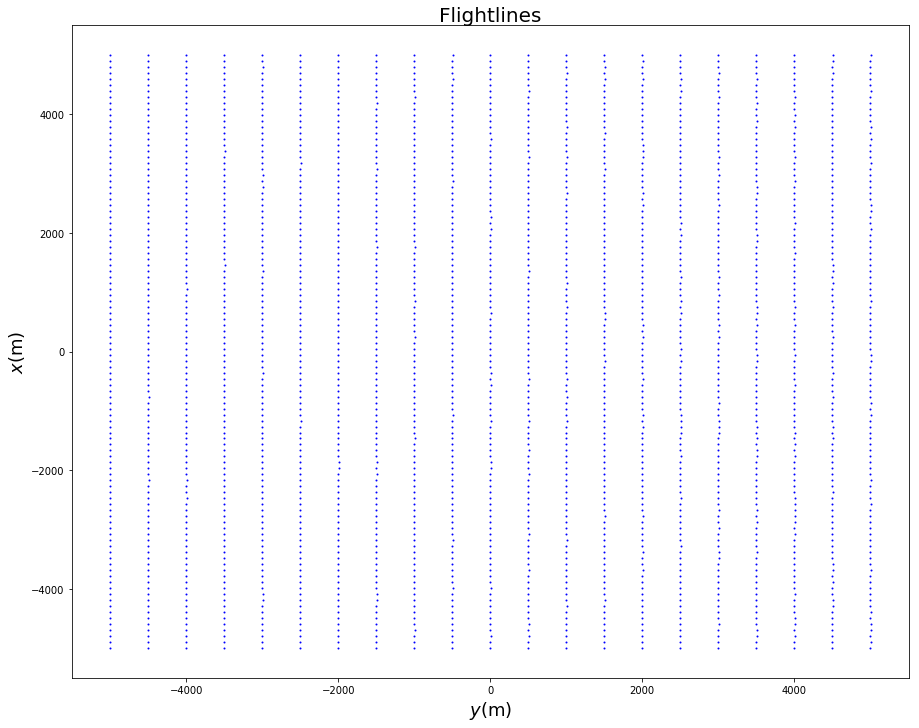

In [44]:
plt.figure(figsize=(15, 12))
plt.title('Flightlines', fontsize=20)
plt.plot(y, x, 'bo', markersize=1)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)

plt.show()

In [45]:
flightlines_grid = dict()
flightlines_grid[shape] = shape
flightlines_grid['N'] = shape[0]*shape[1]
flightlines_grid['area'] = area
flightlines_grid['x'] = x
flightlines_grid['y'] = y
flightlines_grid['z'] = z
flightlines_grid['error'] = error

In [46]:
a = (abs(area[0]) + abs(area[1]))*(abs(area[2]) + abs(area[3]))/1000000.
file_name = 'flightlines_grid_%dpts_%dkm2_%dm.pickle' % (x.size, a, h)
with open(file_name, 'w') as f:
    pickle.dump(flightlines_grid, f)